### Test pydicom module

All examples base on [pydicom webpage](https://pydicom.github.io/pydicom/stable/auto_examples/index.html)

In [1]:
import os
import glob
import numpy as np
import pydicom as dicom
import matplotlib.pyplot as plt

In [2]:
# Folder with all Nifit images
fd = os.path.join('/','media','mk','p1ext4','no19','adni','ADNI','018_S_4313','MPRAGE','2011-11-28_13_10_21.0','S131107')
os.chdir(fd)
print("Data folder:\n\t%s"  % os.getcwd())

Data folder:
	/media/mk/p1ext4/no19/adni/ADNI/018_S_4313/MPRAGE/2011-11-28_13_10_21.0/S131107


In [3]:
files = os.listdir('.')
files.sort()

In [4]:
dcms = []
for f in files:
    dcms.append(dicom.dcmread(f))
print("\nfile count in dcms: {}".format(len(dcms)))


file count in dcms: 170


In [5]:
# moje testowanie, sprawdzam kolejnosc
dcms = []
for f in files[:]:
    n = f.split('_')
    print(n[8:10], end=', ')
    
    d = dicom.dcmread(f)
    dcms.append(d)
    print(d.SliceLocation, d.InstanceNumber)

print("\nfile count: {}".format(len(dcms)))

['20111128161642797', '46'], 53.9998626708984 46
['20111128161642812', '45'], 52.7998657226562 45
['20111128161642828', '42'], 49.1998748779296 42
['20111128161642844', '41'], 47.9998779296875 41
['20111128161642859', '44'], 51.5998687744140 44
['20111128161642875', '43'], 50.3998718261718 43
['20111128161642890', '38'], 44.3998870849609 38
['20111128161642906', '37'], 43.1998901367187 37
['20111128161642937', '40'], 46.7998809814453 40
['20111128161642953', '39'], 45.5998840332031 39
['20111128161642969', '36'], 41.9998931884765 36
['20111128161642984', '35'], 40.7998962402343 35
['20111128161643000', '34'], 39.5998992919921 34
['20111128161643015', '33'], 38.39990234375 33
['20111128161643031', '32'], 37.1999053955078 32
['20111128161643047', '31'], 35.9999084472656 31
['20111128161643062', '30'], 34.7999114990234 30
['20111128161643078', '29'], 33.5999145507812 29
['20111128161643094', '28'], 32.3999176025390 28
['20111128161643109', '27'], 31.1999206542968 27
['20111128161643125', 

In [6]:
# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for d in dcms:
    if hasattr(d, 'SliceLocation'):
        slices.append(d)
    else:
        skipcount = skipcount + 1
print("skipped, #SliceLocation: {}".format(skipcount))

skipped, #SliceLocation: 0


In [7]:
# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

In [8]:
# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

In [9]:
for k in range(5):
    print("{}       \t\t{}".format(slices[k].SliceLocation, slices[k].InstanceNumber))

0       		1
1.19999694824218       		2
2.39999389648437       		3
3.59999084472656       		4
4.79998779296875       		5


In [10]:
# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

In [11]:
# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

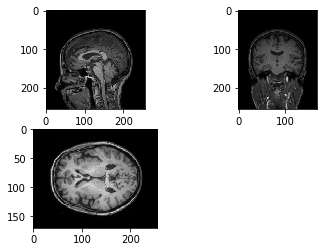

In [12]:
# plot 3 orthogonal slices
plt.figure()
plt.gray()

a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

In [39]:
import mkViewer2A as mkv
import imp
imp.reload(mkv)

%matplotlib qt5

tracker = mkv.IndexTracker(img3d, 'gray', aspect=ax_aspect, title="xxx", rot=False)